<center>

# EDA - LOS ANGELES CRIME

</center>

## Import libraries

In [114]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

## Import data

In [115]:
total_data = pd.read_csv("../data/interim/eda_data.csv")

## Exploration and data cleaning

In [116]:
total_data.head(5)

,date_occ,time_occ,area_name,rpt_dist_no,crm_cd_desc,mocodes,vict_age,vict_sex,vict_descent,premis_desc,weapon_desc,status_desc,location,lat,lon
0,2020-01-08,2230,Southwest,377,BATTERY - SIMPLE ASSAULT,0444 0913,36,F,B,SINGLE FAMILY DWELLING,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",Adult Other,1100 W 39TH PL,34.0141,-118.2978
1,2020-01-01,330,Central,163,BATTERY - SIMPLE ASSAULT,0416 1822 1414,25,M,H,SIDEWALK,UNKNOWN WEAPON/OTHER WEAPON,Invest Cont,700 S HILL ST,34.0459,-118.2545
2,2020-02-13,1200,Central,155,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,1501,0,X,X,POLICE FACILITY,NaN,Adult Arrest,200 E 6TH ST,34.0448,-118.2474
3,2020-01-01,1730,N Hollywood,1543,VANDALISM - MISDEAMEANOR ($399 OR UNDER),0329 1402,76,F,W,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,Invest Cont,5400 CORTEEN PL,34.1685,-118.4019
4,2020-01-01,415,Mission,1998,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",0329,31,X,X,BEAUTY SUPPLY STORE,NaN,Invest Cont,14400 TITUS ST,34.2198,-118.4468


In [117]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 433936 entries, 0 to 433935
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   date_occ      433936 non-null  object 
 1   time_occ      433936 non-null  int64  
 2   area_name     433936 non-null  object 
 3   rpt_dist_no   433936 non-null  int64  
 4   crm_cd_desc   433936 non-null  object 
 5   mocodes       374863 non-null  object 
 6   vict_age      433936 non-null  int64  
 7   vict_sex      377464 non-null  object 
 8   vict_descent  377461 non-null  object 
 9   premis_desc   433651 non-null  object 
 10  weapon_desc   154873 non-null  object 
 11  status_desc   433936 non-null  object 
 12  location      433936 non-null  object 
 13  lat           433936 non-null  float64
 14  lon           433936 non-null  float64
dtypes: float64(2), int64(3), object(10)
memory usage: 49.7+ MB


In [118]:
total_data["date_occ"] = pd.to_datetime(total_data["date_occ"]).dt.date
total_data["date_occ"] = pd.to_datetime(total_data["date_occ"])

In [119]:
total_data["month"] = total_data["date_occ"].apply(lambda x:x.strftime("%A"))
total_data["weekday"] = total_data["date_occ"].apply(lambda x:x.strftime("%B"))

### Count and eliminate duplicates

In [120]:
duplicate_count = total_data.duplicated().sum()
duplicate_count

0

## Eliminate irrelevant information

In [121]:
columns = total_data.columns
columns

Index(['date_occ', 'time_occ', 'area_name', 'rpt_dist_no', 'crm_cd_desc',
       'mocodes', 'vict_age', 'vict_sex', 'vict_descent', 'premis_desc',
       'weapon_desc', 'status_desc', 'location', 'lat', 'lon', 'month',
       'weekday'],
      dtype='object')

## Analysis of univariate variables

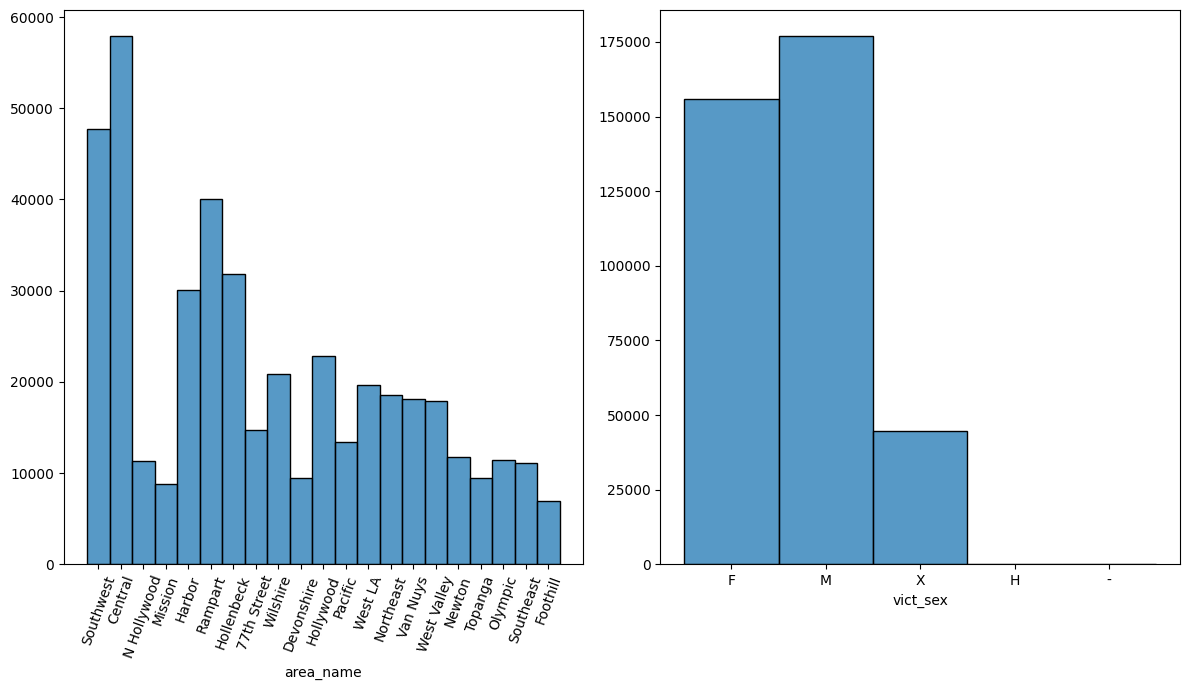

In [122]:
fig, axis = plt.subplots(1,2, figsize = (12, 7))

# Crear un histograma múltiple
sns.histplot(ax = axis[0], data = total_data, x = "area_name").set(ylabel = None) 
axis[0].tick_params(axis='x', rotation=70)

sns.histplot(ax = axis[1], data = total_data, x = "vict_sex").set(ylabel = None)


# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

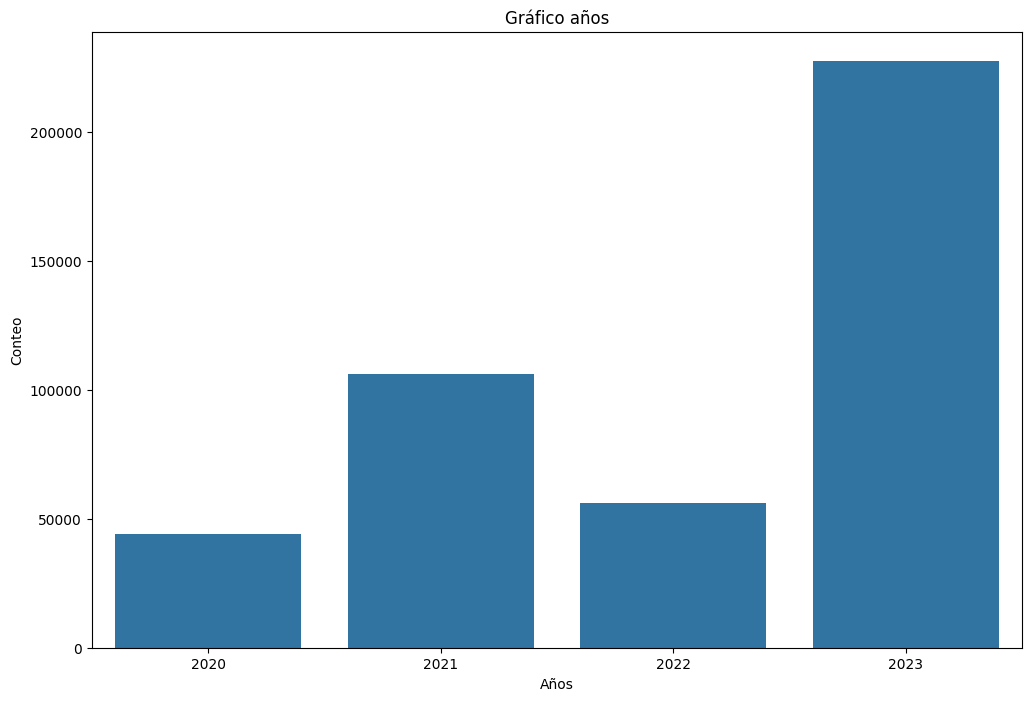

In [123]:
plt.figure(figsize=(12, 8))

# Crear el histograma utilizando Seaborn
ax=sns.barplot(x=total_data["date_occ"].dt.year.value_counts().index, 
                 y=total_data["date_occ"].dt.year.value_counts())

# Configurar etiquetas y título
plt.xlabel('Años')
plt.ylabel('Conteo')
plt.title('Gráfico años')

# Mostrar el gráfico
plt.show()

In [124]:
delitos=total_data.value_counts("crm_cd_desc")[0:50]
delitos=pd.DataFrame(delitos)
delitos.head()

,count
crm_cd_desc,
VEHICLE - STOLEN,45699
BATTERY - SIMPLE ASSAULT,37058
BURGLARY FROM VEHICLE,28205
"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)",27133
"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",25648


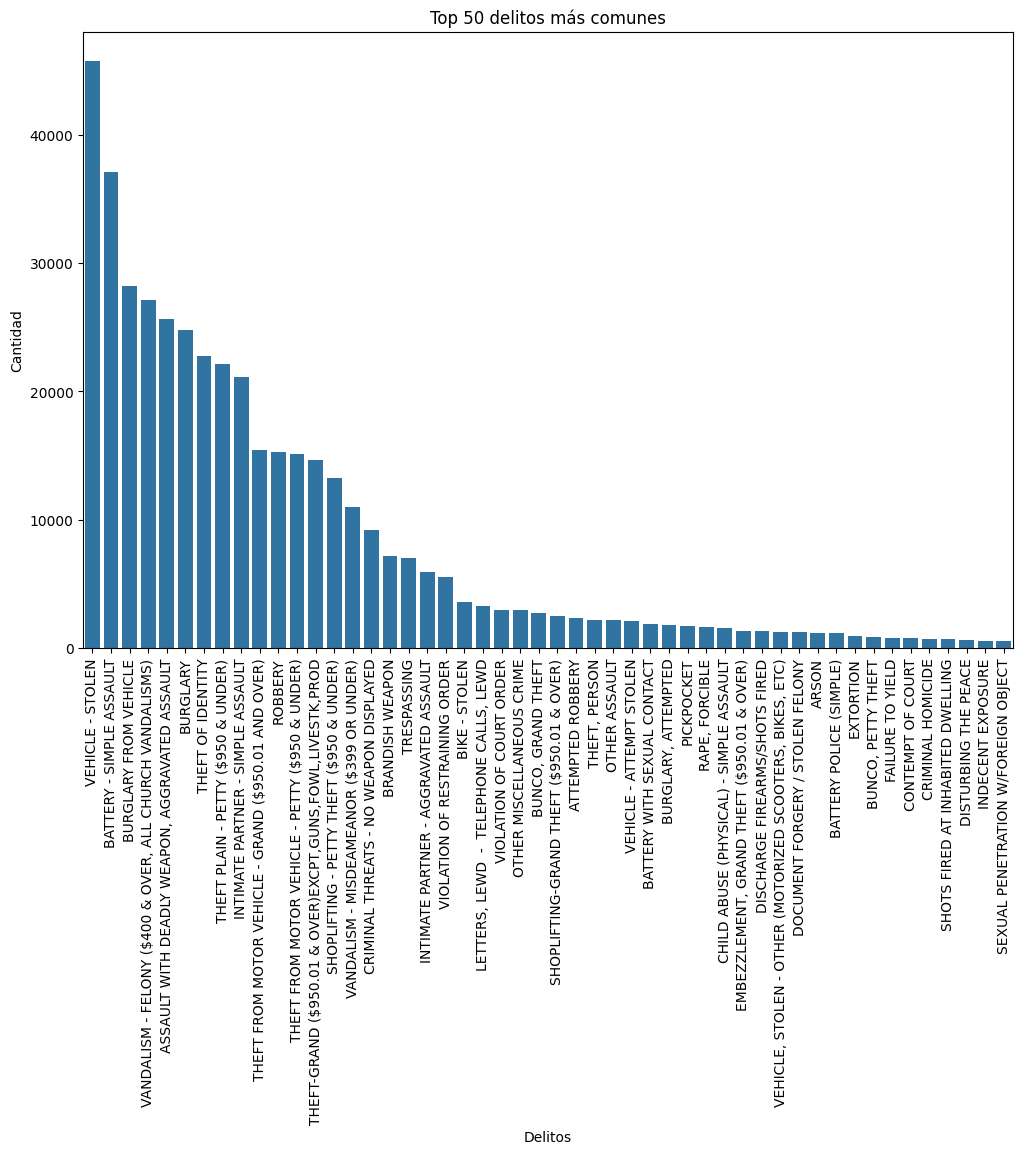

In [125]:
plt.figure(figsize=(12, 8))

# Crear el histograma utilizando Seaborn
ax=sns.barplot(x=delitos.index, y=delitos['count'], data=delitos)

# Configurar etiquetas y título
plt.tick_params(axis = "x", labelrotation=90)
plt.xlabel('Delitos')
plt.ylabel('Cantidad')
plt.title('Top 50 delitos más comunes')

# Mostrar el gráfico
plt.show()

In [126]:
hours= pd.to_datetime(total_data["time_occ"].astype(str), format="%H%M", errors="coerce").dt.time
hours = hours.value_counts("time_occ")[0:50]
hours=pd.DataFrame(hours)
hours=hours.sort_index()
hours.head()

,proportion
time_occ,
03:00:00,0.015009
03:30:00,0.003603
04:00:00,0.007785
04:30:00,0.003507
05:00:00,0.007252


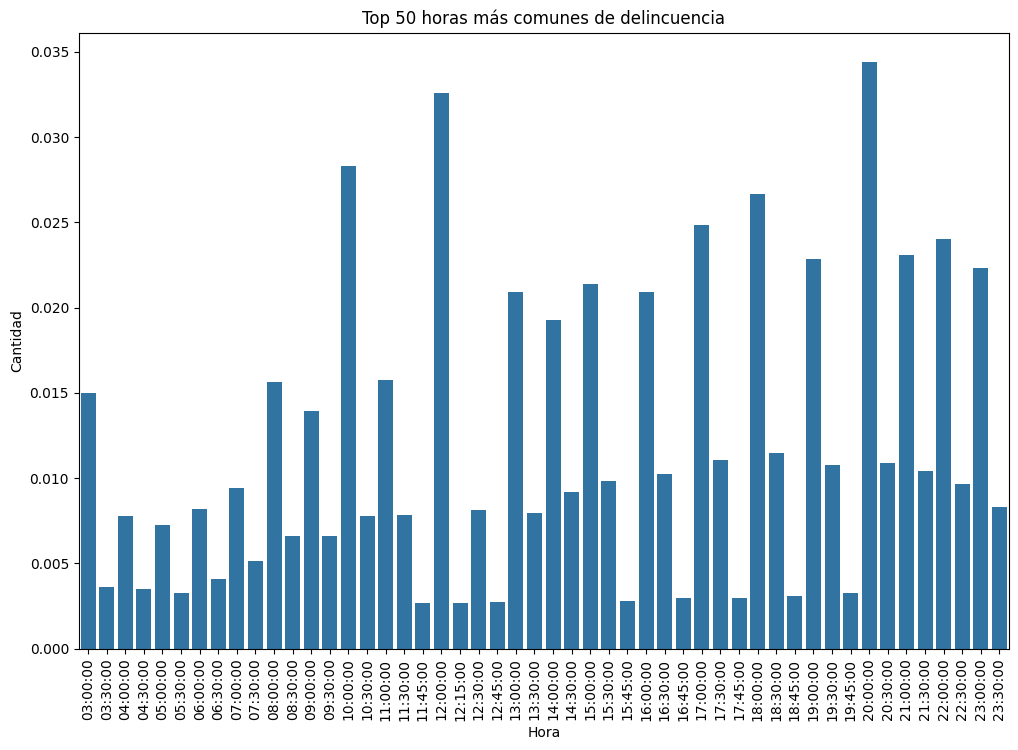

In [127]:
plt.figure(figsize=(12, 8))

# Crear el histograma utilizando Seaborn
ax=sns.barplot(x=hours.index, y=hours['proportion'], data=hours)

# Configurar etiquetas y título
plt.tick_params(axis = "x", labelrotation=90)
plt.xlabel('Hora')
plt.ylabel('Cantidad')
plt.title('Top 50 horas más comunes de delincuencia')

# Mostrar el gráfico
plt.show()

In [128]:
rpt_codes=total_data.value_counts("rpt_dist_no")[0:50]
rpt_codes=pd.DataFrame(rpt_codes)
rpt_codes.head()

,count
rpt_dist_no,
162,4553
182,4015
111,3294
152,2607
153,2528


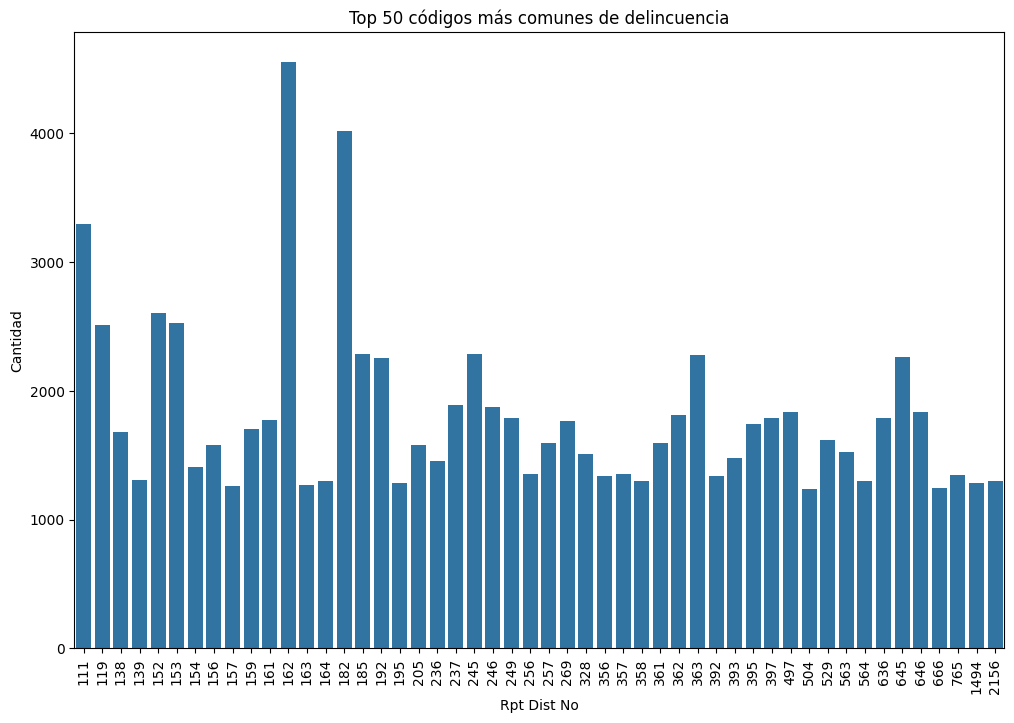

In [129]:
plt.figure(figsize=(12, 8))

# Crear el histograma utilizando Seaborn
ax=sns.barplot(x=rpt_codes.index, y=rpt_codes['count'], data=rpt_codes)

# Configurar etiquetas y título
plt.tick_params(axis = "x", labelrotation=90)
plt.xlabel('Rpt Dist No')
plt.ylabel('Cantidad')
plt.title('Top 50 códigos más comunes de delincuencia')

# Mostrar el gráfico
plt.show()

<Axes: xlabel='vict_age'>

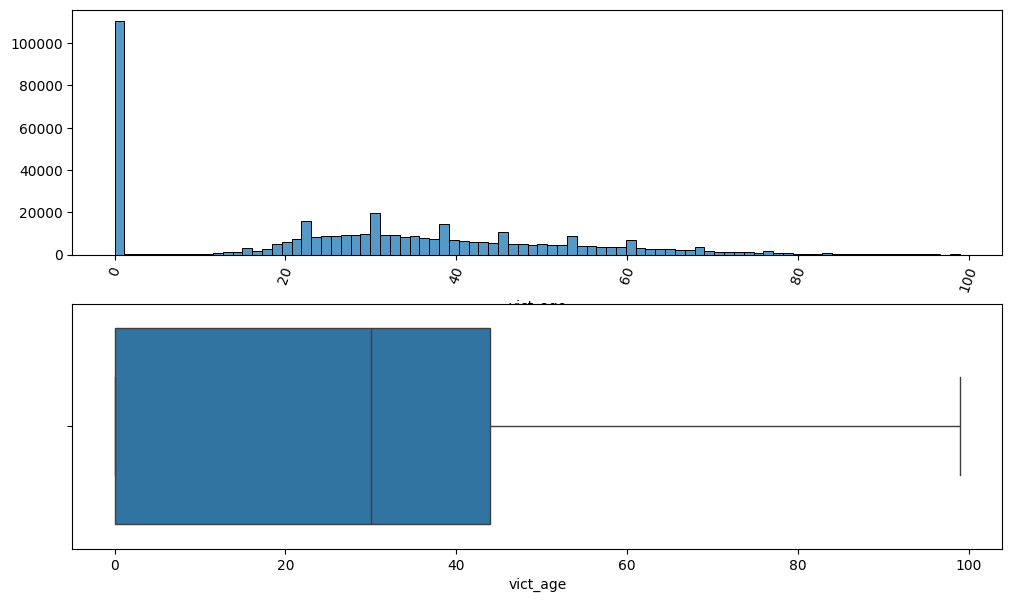

In [ ]:
fig, axis = plt.subplots(2,1, figsize = (12, 7))

# Crear un histograma múltiple
sns.histplot(ax = axis[0], data = total_data, x = "vict_age").set(ylabel = None) 
sns.boxplot(ax = axis[1], data = total_data, x = "vict_age")

<Axes: xlabel='date_occ'>

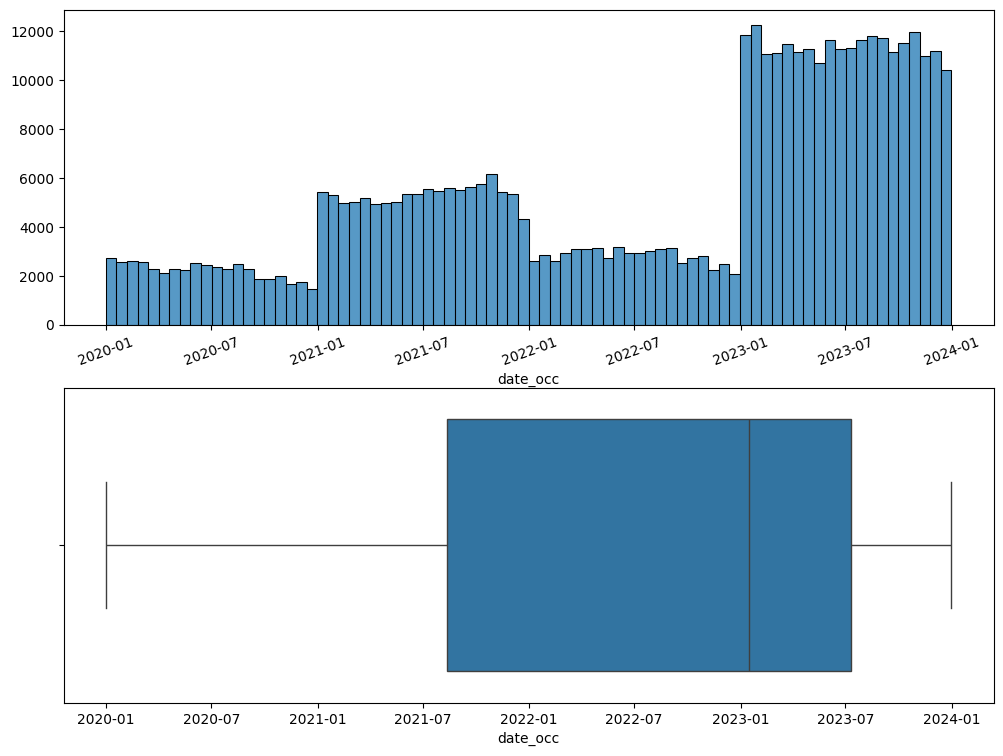

In [131]:
fig, axis = plt.subplots(2,1, figsize = (12, 9))

# Crear un histograma múltiple
sns.histplot(ax = axis[0], data = total_data, x = "date_occ").set(ylabel = None) 
axis[0].tick_params(axis='x', rotation=20)
sns.boxplot(ax = axis[1], data = total_data, x = "date_occ")#.set(xlabel = None)

In [132]:
descent=total_data.value_counts("vict_descent")
descent=pd.DataFrame(descent)
descent.head()

,count
vict_descent,
H,134294
W,82140
B,62356
X,48057
O,32126


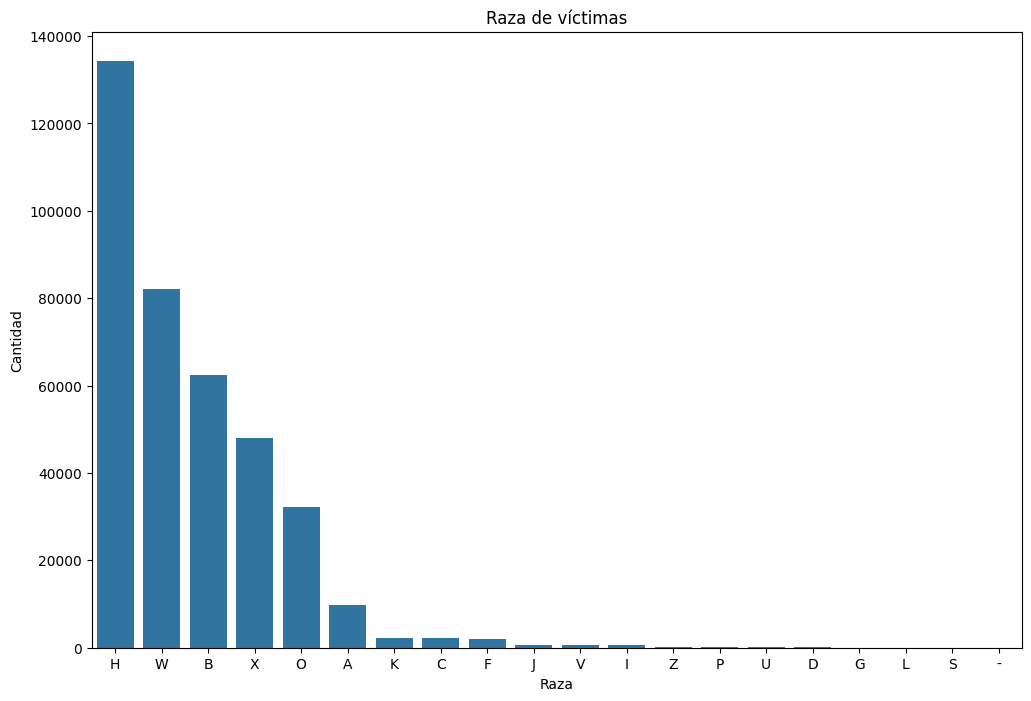

In [133]:
plt.figure(figsize=(12, 8))

# Crear el histograma utilizando Seaborn
ax=sns.barplot(x=descent.index, y=descent['count'], data=descent)

# Configurar etiquetas y título
plt.xlabel('Raza')
plt.ylabel('Cantidad')
plt.title('Raza de víctimas')

# Mostrar el gráfico
plt.show()

In [134]:
weapon_desc=total_data.value_counts("weapon_desc")[0:50]
weapon_desc=pd.DataFrame(weapon_desc)
weapon_desc.head()

,count
weapon_desc,
"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",82492
UNKNOWN WEAPON/OTHER WEAPON,17574
VERBAL THREAT,11286
HAND GUN,9745
KNIFE WITH BLADE 6INCHES OR LESS,3371


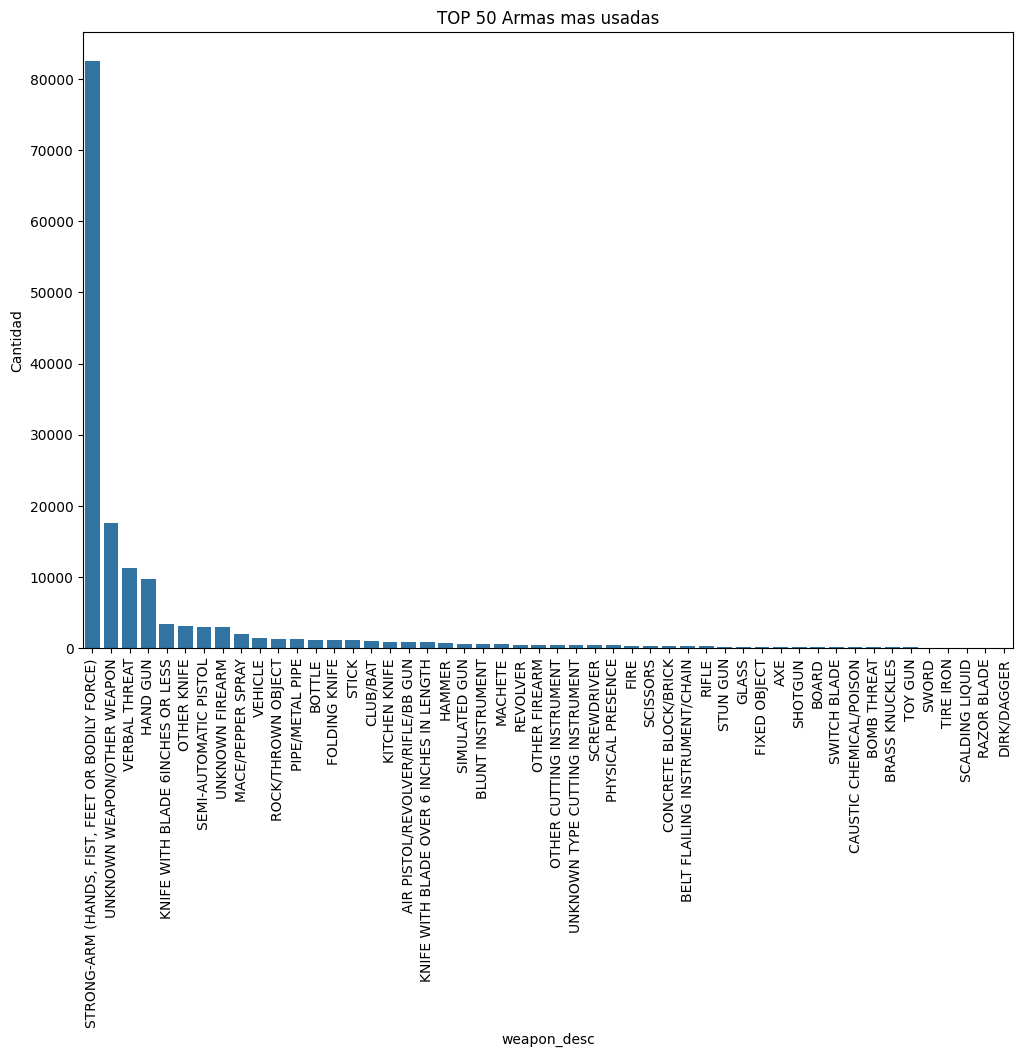

In [135]:
plt.figure(figsize=(12, 8))

# Crear el histograma utilizando Seaborn
ax=sns.barplot(x=weapon_desc.index, y=weapon_desc['count'], data=weapon_desc)
plt.tick_params(axis = "x", labelrotation=90)

# Configurar etiquetas y título
plt.xlabel('weapon_desc')
plt.ylabel('Cantidad')
plt.title('TOP 50 Armas mas usadas')

# Mostrar el gráfico
plt.show()

In [136]:
is_weapon=total_data["weapon_desc"].isnull().value_counts()
is_weapon#.value_counts()

weapon_desc
True     279063
False    154873
Name: count, dtype: int64

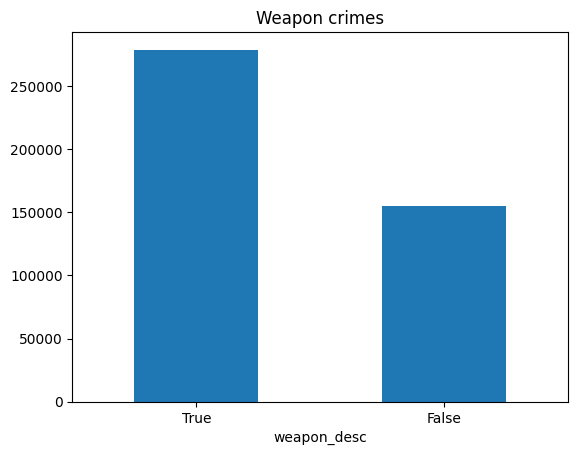

In [137]:
is_weapon.plot(kind='bar',rot=0, title='Weapon crimes')
plt.show()

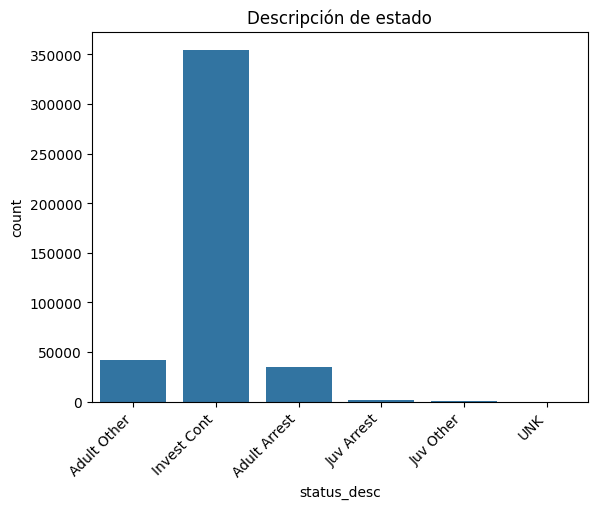

In [138]:
sns.countplot(x='status_desc', data=total_data)
plt.xticks(rotation=45, ha='right')
plt.title('Descripción de estado')
plt.show()

In [139]:
location = total_data.value_counts("location")[0:50]
location = pd.DataFrame(location)
location.head()


,count
location,
800 N ALAMEDA ST,1623
7TH,1247
6TH ST,1228
7TH ST,1178
6TH,1175


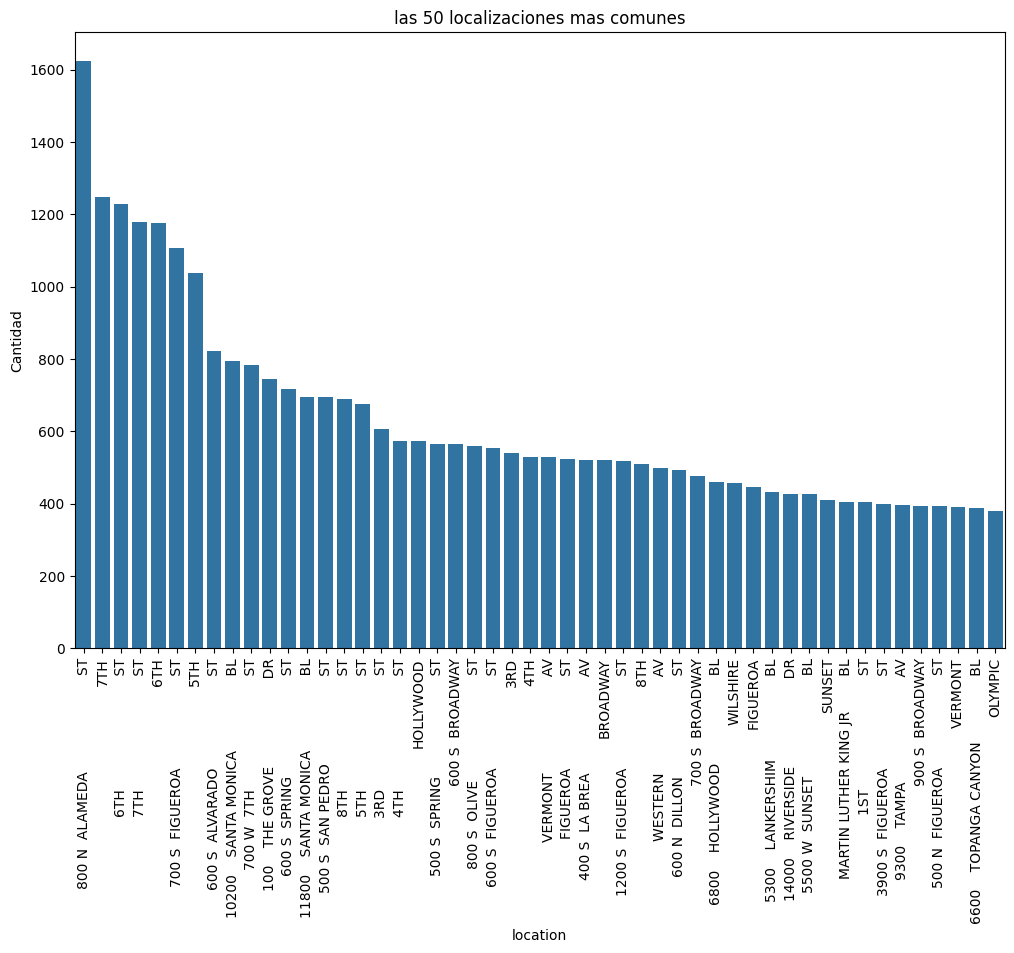

In [140]:
plt.figure(figsize=(12, 8))

# Crear el histograma utilizando Seaborn
ax=sns.barplot(x=location.index, y=location['count'], data=location)

# Configurar etiquetas y título
plt.tick_params(axis = "x", labelrotation=90)
plt.xlabel('location')
plt.ylabel('Cantidad')
plt.title("las 50 localizaciones mas comunes")

# Mostrar el gráfico
plt.show()

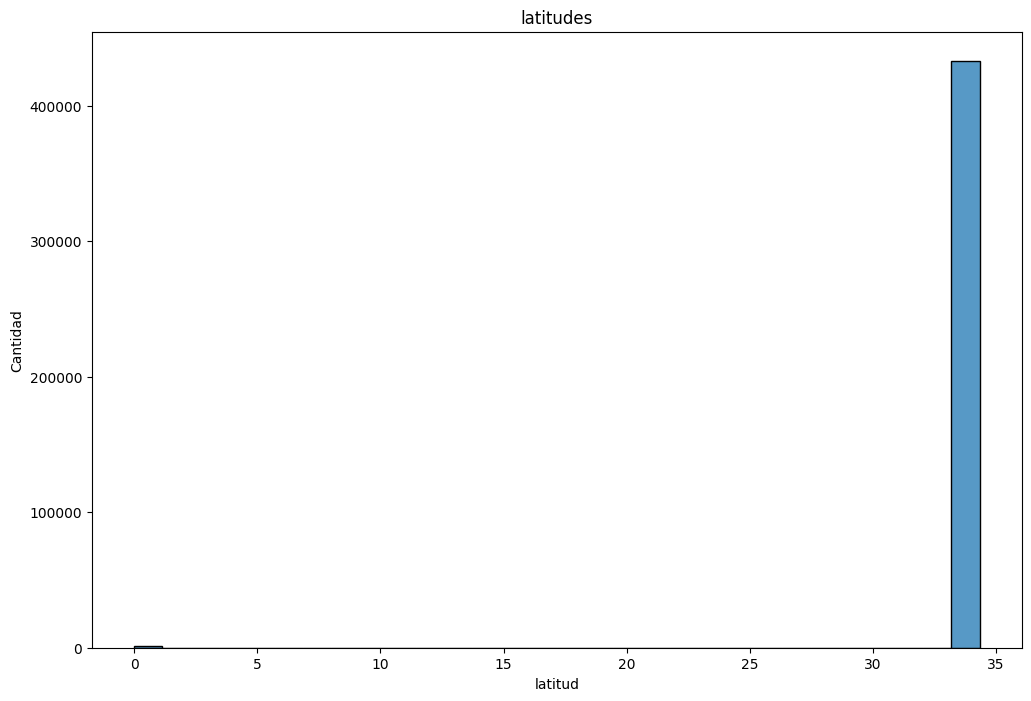

In [ ]:
plt.figure(figsize=(12, 8))

# Crear el histograma utilizando Seaborn
sns.histplot(x=total_data["lat"], bins=30, kde=False)

# Configurar etiquetas y título
plt.xlabel('latitud')
plt.ylabel('Cantidad')
plt.title('latitudes')

# Mostrar el gráfico
plt.show()

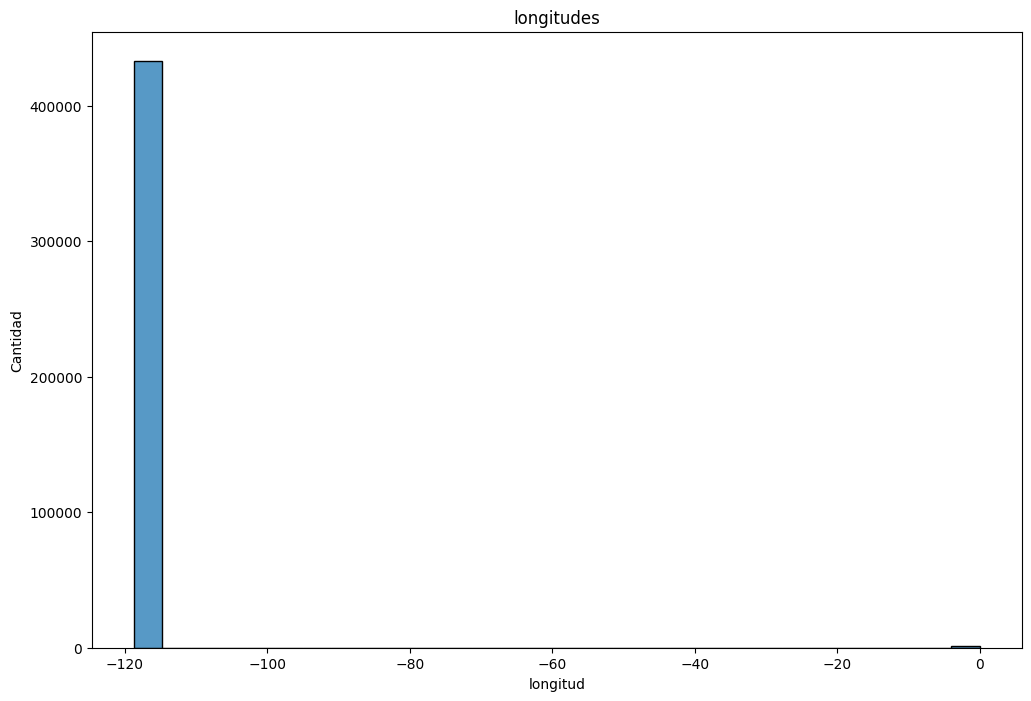

In [ ]:
plt.figure(figsize=(12, 8))

# Crear el histograma utilizando Seaborn
sns.histplot(x=total_data["lon"], bins=30, kde=False)

# Configurar etiquetas y título
plt.xlabel('longitud')
plt.ylabel('Cantidad')
plt.title('longitudes')

# Mostrar el gráfico
plt.show()

## Analysis of multivariate variables

Numerical-numerical analysis

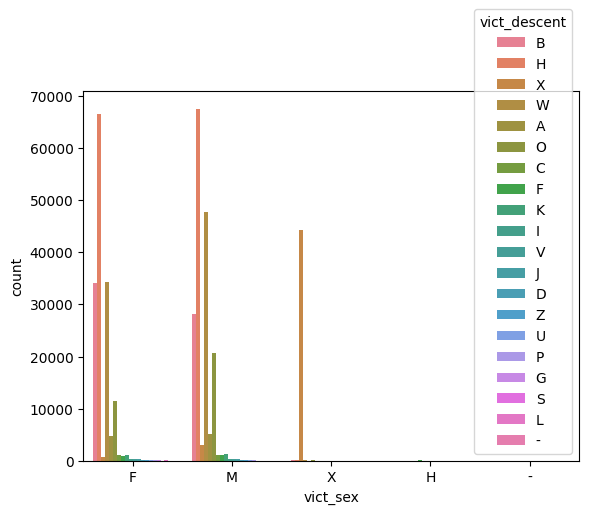

In [143]:
# Create a multiple scatter diagram
sns.countplot( data = total_data, x = "vict_sex", hue = "vict_descent")

# Show the plot
plt.show()

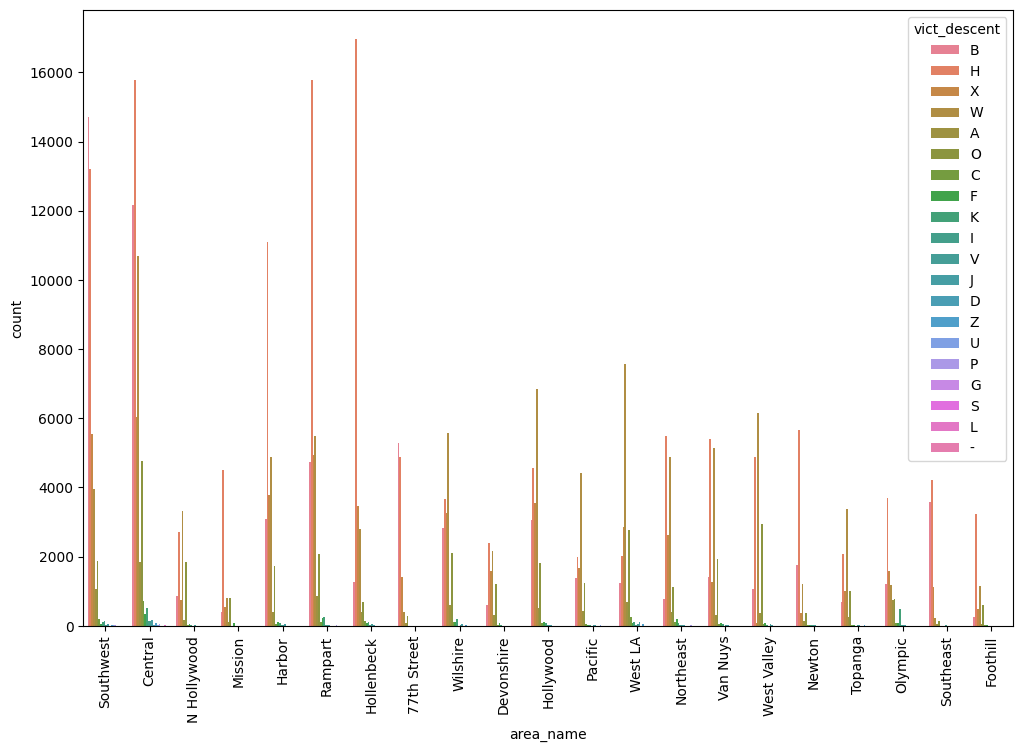

In [144]:
plt.figure(figsize=(12, 8))
# Create a multiple scatter diagram
sns.countplot( data = total_data, x = "area_name", hue = "vict_descent")
plt.tick_params(axis = "x", labelrotation=90)
# Show the plot
plt.show()

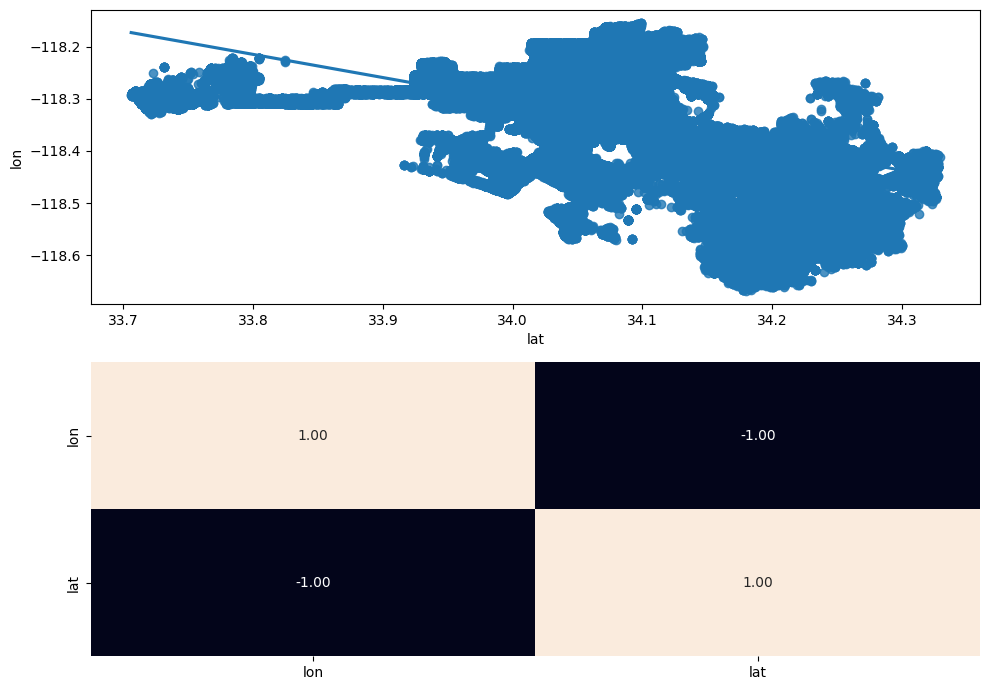

In [145]:
fig, axis = plt.subplots(2, figsize = (10, 7))

# Create a multiple scatter diagram
sns.regplot(ax = axis[0], data = total_data[total_data["lat"] > 0], x = "lat", y = "lon")
sns.heatmap(total_data[["lon", "lat"]].corr(), annot = True, fmt = ".2f", ax = axis[1], cbar = False)

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

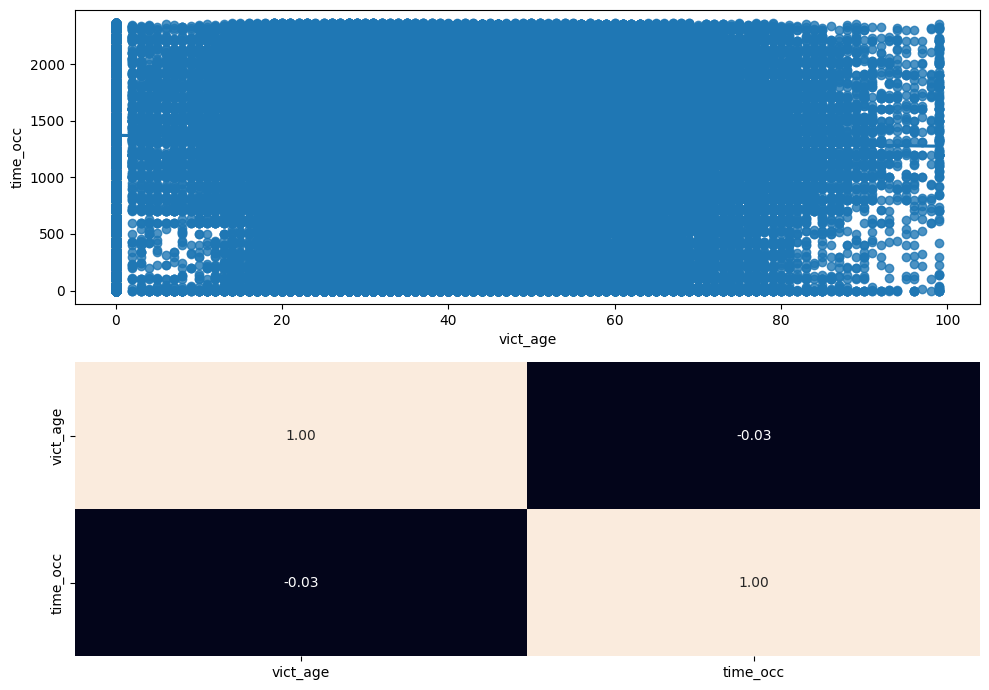

In [146]:
fig, axis = plt.subplots(2, figsize = (10, 7))

# Create a multiple scatter diagram
sns.regplot(ax = axis[0], data = total_data, x = "vict_age", y = "time_occ")
sns.heatmap(total_data[["vict_age", "time_occ"]].corr(), annot = True, fmt = ".2f", ax = axis[1], cbar = False)

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

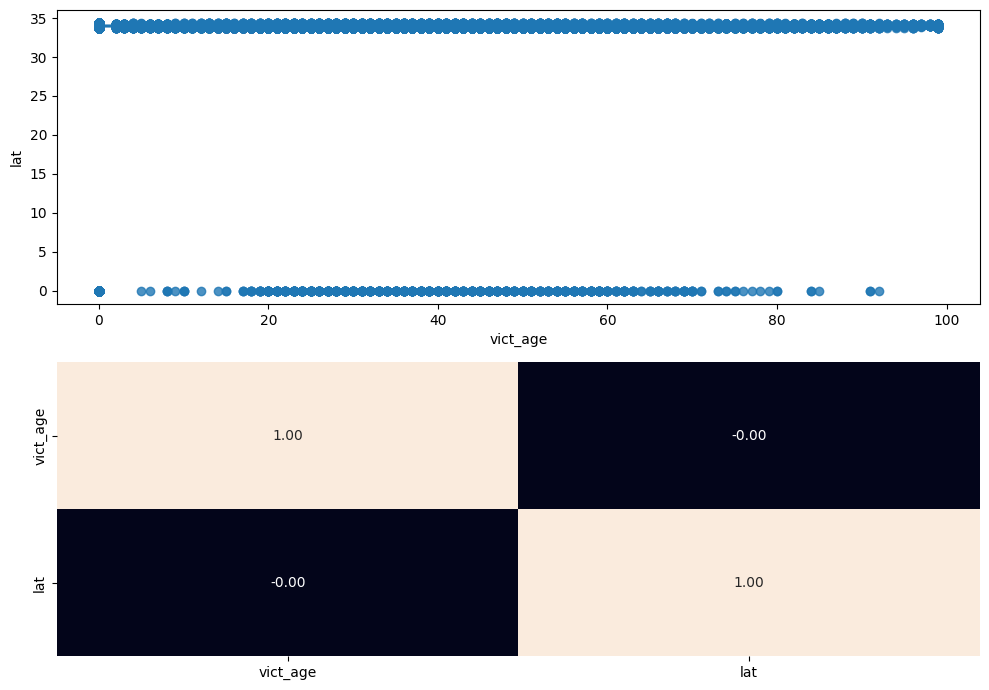

In [147]:
fig, axis = plt.subplots(2, figsize = (10, 7))

# Create a multiple scatter diagram
sns.regplot(ax = axis[0], data = total_data, x = "vict_age", y = "lat")
sns.heatmap(total_data[["vict_age", "lat"]].corr(), annot = True, fmt = ".2f", ax = axis[1], cbar = False)

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

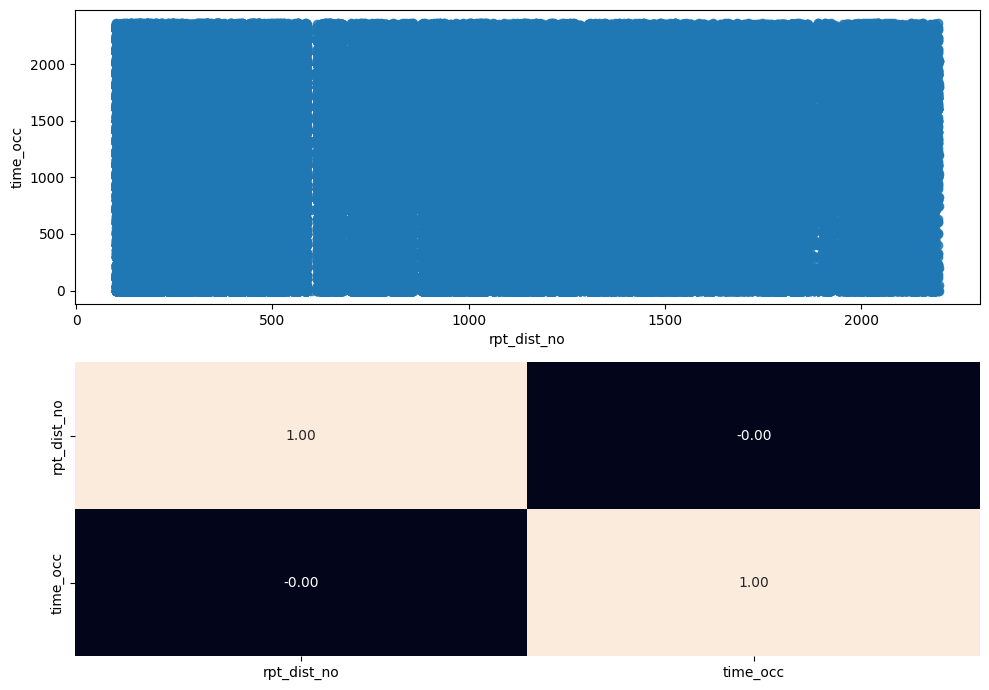

In [148]:
fig, axis = plt.subplots(2, figsize = (10, 7))

# Create a multiple scatter diagram
sns.regplot(ax = axis[0], data = total_data, x = "rpt_dist_no", y = "time_occ")
sns.heatmap(total_data[["rpt_dist_no", "time_occ"]].corr(), annot = True, fmt = ".2f", ax = axis[1], cbar = False)

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
total_data = total_data[total_data['vict_sex'].isin(["M", "F", "X"]) | total_data['vict_sex'].isnull()]
total_data['vict_sex'].value_counts()

In [ ]:
total_data["weapon_desc"].fillna("No weapon used", inplace = True)
total_data["weapom_desc"] 

In [ ]:
total_data.drop(total_data.loc[total_data["lat"] == 0].index, axis=0, inplace= True)

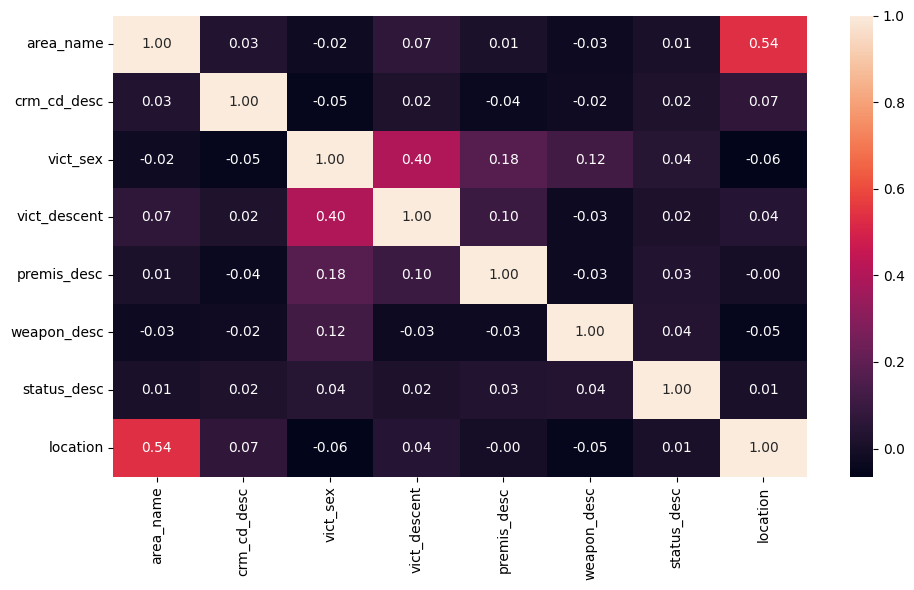

In [149]:
total_data["area_name"] = pd.factorize(total_data["area_name"])[0]
total_data["crm_cd_desc"] = pd.factorize(total_data["crm_cd_desc"])[0]
total_data["vict_sex"] = pd.factorize(total_data["vict_sex"])[0]
total_data["vict_descent"] = pd.factorize(total_data["vict_descent"])[0]
total_data["premis_desc"] = pd.factorize(total_data["premis_desc"])[0]
total_data["weapon_desc"] = pd.factorize(total_data["weapon_desc"])[0]
total_data["status_desc"] = pd.factorize(total_data["status_desc"])[0]
total_data["location"] = pd.factorize(total_data["location"])[0]
fig, axis = plt.subplots(figsize = (10, 6))
sns.heatmap(total_data[['area_name', 'crm_cd_desc', 'vict_sex', 'vict_descent',
       'premis_desc', 'weapon_desc', 'status_desc', 'location']].corr(), annot = True, fmt = ".2f")
plt.tight_layout()
plt.show()

In [150]:
total_data['mocodes'] = total_data['mocodes'].astype(str)

In [151]:
total_data['mocodes'] = total_data['mocodes'].apply(lambda x: x.split(' '))

In [152]:
total_data['mocodes'].head()

0          [0444, 0913]
1    [0416, 1822, 1414]
2                [1501]
3          [0329, 1402]
4                [0329]
Name: mocodes, dtype: object